# Practical 3b

From the file PCA2.ipynb you'll remember that when we mapped down to 1D there seems to be two clusters (see below). Your challange here is to implement a K-means clustering algorithm over that 1D data with K=2. The original PCA2.ipynb is below for ease.

Generate some random data

In [1]:
import numpy as np
from sklearn import datasets


def _generating_data():
    random_state = 180
    X, _ = datasets.make_blobs(n_samples=50, n_features = 3, 
                               centers=3, cluster_std=[3, 2, 3], 
                               random_state=random_state)
    transformation = [[1.6, -0.6, 0.2], [-0.8, 0.8, -0.8], [0.1, 0.2, 0.3]]
    X_aniso = np.dot(X, transformation)
    X_aniso[:,0] = X_aniso[:,0]-7
    X_aniso[:,1] = X_aniso[:,1]+17
    return X_aniso


X = _generating_data()
X_mean = np.mean(X, axis=0)
print(X_mean)

[-7.01430732 16.42789047  2.74528803]


Let's see what this looks like in 3D

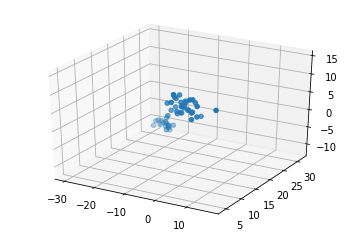

In [2]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

x,y,z = X.T
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z)

Re-centre the data so the mean is at the origin and compute the covariance matrix

In [3]:
X_centred = X - X_mean
X_cov = np.matmul(X_centred.T,X_centred)/(np.shape(X)[0]-1) # the demominator could be N or (N-1)
#print('conv can also be calculated using numpy function')
#X_cov = np.cov(X_centred.T)

Output the covariance matrix to see what it contains

In [4]:
print(X_cov)

[[ 147.56116479 -100.8111999    97.26752068]
 [-100.8111999    71.94775317  -69.92319843]
 [  97.26752068  -69.92319843   70.80592741]]


Compute the eignevalues and eigenvectors

In [5]:
eig_vals, eig_vecs = np.linalg.eig(X_cov)

Let's take a look at these

In [6]:
print('eig_vals:')
print(eig_vals)
print('eig_vectors:')
print(eig_vecs)

eig_vals:
[284.54534262   4.86021038   0.90929238]
eig_vectors:
[[-0.71496802  0.64878033  0.26058554]
 [ 0.49982035  0.21367973  0.83935725]
 [-0.48887662 -0.73035954  0.47704778]]


We're going to plot this in 2D so just keep the first two eigenvectors

In [7]:
eig_vecs2 = eig_vecs[:,0:2]
print(eig_vecs2)

[[-0.71496802  0.64878033]
 [ 0.49982035  0.21367973]
 [-0.48887662 -0.73035954]]


Transform points into this new space

In [8]:
X_pca = np.matmul(X_centred, eig_vecs2)

Now do a 2D plot of the data

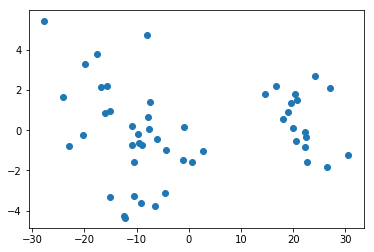

retained variance =  0.9968679094794408


In [9]:
x_p, y_p = X_pca.T
plt.scatter(x_p, y_p)

plt.show()
print('retained variance = ', (eig_vals[0]+eig_vals[1])/np.sum(eig_vals))

What if we map down to just 1D?

In [10]:
eig_vecs1 = eig_vecs[:,0:1]
print(eig_vecs1)

[[-0.71496802]
 [ 0.49982035]
 [-0.48887662]]


Compute the points in 1D

In [11]:
X_pca = np.matmul(X_centred, eig_vecs1)

Plot the points to see what they look like

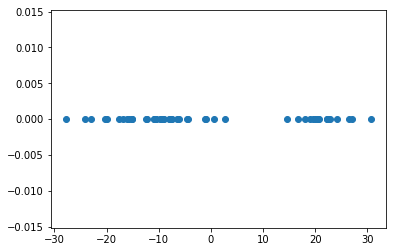

retained variance =  0.9801267387947304


In [12]:
x_p = X_pca.T
zero = np.zeros(x_p.shape)
plt.scatter(x_p, zero)

plt.show()
print('retained variance = ', (eig_vals[0])/np.sum(eig_vals))

# Now over to you

In the lecture slides there's psudo code for a K-means cluster. Starting with that code write a 1D K-means clustering algorithm with K=2.

There's two ways of doing this. The first is to write your own k-means approach. The second is to use k-means from sklearn.

# Approach 1 - your own k-means

Some Hints:

- You need to store the mean for the two centroids.
- Perhaps holding the points in two lists for the values closest to the two centroids will work.
- You could write a function which computes which centroid a value is closest to and a second function which allocate the value to the right list
- You could write a function which computes the average of all points in a list

In [ ]:
# Flatten the data to a 1D array
x_p2 = x_p.flatten()

# Below are some further hints which you may choose to use, or write it yourself from scratch

You've now got your 1D array which you can use to perform K-Means clustering over (x_p2).

Pick two points at random to be our two centroids

In [ ]:
...

Function to return true if a value is closer to centroid 1 than centroid 2

In [ ]:
...

Function which returns two lists (one for each centroid). For each value work out which centroid it's closest to and add it to the matching list.

In [ ]:
...

Function which returns the mean of the values in a list (for computing the new centroid)

In [ ]:
...

The main loop - from the slides. 

Repeat:
- use the function which you've written to split points into two lists. This will give you the values closest to the two centroids.
- Work out the mean of these two lists to give you your two new centroids.
- Check to see how much the mean values have changed since the last time around the loop. If no change we're done.

In [ ]:
...

# Approach 2 - using sklearn